<a href="https://colab.research.google.com/github/DaniilSysoev/opisis_sem_7/blob/main/%D0%9E%D0%BF%D0%B8%D1%81%D0%B8%D1%81_%D1%81%D0%B5%D0%BC_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Введение в численные методы для реализации дискретной модели линии передачи. Решение обыкновенных дифференциальных уравнений, численное интегрирование, методы решения нелинейных (трансцендентных) уравнений.</h1>

<h2>Задание: Получить сигнал, который опишет колебания маятника, произвести БПФ для этого сигнала и построить на основе полученных данных график.
Задать сложный сигнал (пару синусов и косинусов с разными периодами), посчитать его интеграл методом прямоугольников, трапеций, по формуле Симпсона и по формуле Ньютона-Лейбница. Построить график среднего значения мощности заданного сигнала по указанным выше методам.</h2>

<h2>Часть 1. Модель маятника</h2>

<h3>Добавим необходимые библиотеки для рассчета</h3>

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

<h3>Введем необходимые данные</h3>
<h4>Входные данные:</h4>
<h5>Начальное отклонение маятника: 5<br>
Начальная скорость маятника: 0<br>
Частота колебаний маятника: 5<br>
Временной интервал: 10<br>
Число временных отсчетов: 1000</h5>

In [ ]:
x0 = float(input('Начальное отклонение маятника '))
v0 = float(input('Начальная скорость маятника '))
f0 = float(input('Частота колебаний маятника '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

Начальное отклонение маятника 5
Начальная скорость маятника 0
Частота колебаний маятника 5
Временной интервал 10
Число временных отсчетов 1000


<h3>Введем временную шкалу</h3>

In [ ]:
t = np.linspace(0, T, n)
ax = [0] * n
av = [0] * n

<h3>Проведем рассчеты координаты и скорости</h3>

In [ ]:
av[0] = v0
ax[0] = x0
dt = T / (n - 1)
for i in range(1, n):
    av[i] = av[i - 1] - (2.0 * pi * f0) ** 2 * ax[i - 1] * dt
    ax[i] = ax[i - 1] + av[i] * dt

<h3>Введем частотную шкалу</h3>

In [ ]:
spec = np.fft.fft(ax)
freq = np.fft.fftfreq(n, T / n)

<h3>Построим графики координаты, скорости от времени и частотного спектра</h3>

<h4>График координаты от времени</h4>

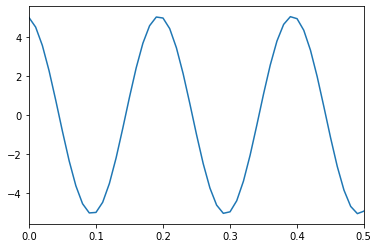

In [ ]:
plt.plot(t, ax)
plt.axis(xmin=0, xmax=0.5)
plt.show()


<h4>График скорости от времени</h4>

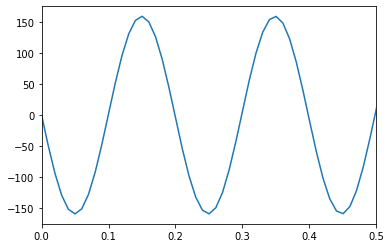

In [ ]:
plt.plot(t, av)
plt.axis(xmin=0, xmax=0.5)
plt.show()

<h4>Частотный спектр</h4>

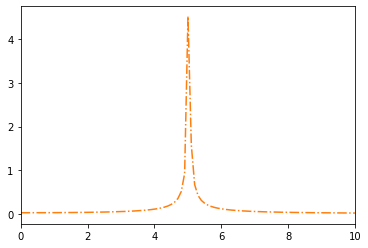

In [ ]:
plt.plot(freq[0:n // 2], (np.hypot(spec.real, spec.imag) / n * 2.0)[0:n // 2], '-.', color='tab:orange', label='БПФ')
plt.axis(xmin=0, xmax=2 * f0)
plt.show()

<h2>Часть 2</h2>

<h3>Введем необходимые функции для рассчета</h3>

In [ ]:
def signal(f, t):
    return 1.0 + sin(2.0*pi*f*t) + 2.0 * cos(4.0*pi*f*t) + 0.5 * cos(6.0*pi*f*t)

def adsign(f, t):
    return t - cos(2.0*pi*f*t)/(2*pi*f) + sin(4.0*pi*f*t)/(2*pi*f) + sin(6.0*pi*f*t)/(12*pi*f)

def rect_integral(x, f):
    sum = 0
    for i in range(len(x)-1):
        sum += f[i] * (x[i+1] - x[i])
    return sum

def trap_integral(x, f):
    sum = 0
    for i in range(len(x)-1):
        sum += 0.5 * (f[i] + f[i+1]) * (x[i+1] - x[i])
    return sum

def simp_integral(x, f):
    sum = 0
    for i in range(1, len(x)-1, 2):
    #for i in range(len(x)-1):
        h = x[i+1]-x[i-1]
        #h = x[i+1] - x[i]
        sum += h/6 * (f[i-1] + 4 * f[i] + f[i+1])
        #sum += h/6 * (f[i-1] + 2 * (f[i]+f[i+1]) + f[i+1])
    return sum

<h3>Введем необходмые данные</h3>
<h4>Входные данные:</h4>
<h5>Опорная частота сигнала: 5<br>
Временной интервал: 10<br>
Число временных отсчетов: 1001<br></h5>

In [ ]:
f = float(input('Опорная частота сигнала '))
T = float(input('Временной интервал '))
n = int(input('Число временных отсчетов '))

Опорная частота сигнала 5
Временной интервал 10
Число временных отсчетов 1001


<h3>Введем временную шкалу</h3>

In [ ]:
t = np.linspace(0, T, n)
u = [0] * n
for i in range(n):
    u[i] = signal(f, t[i])

<h3>Рассчитаем значение интеграла каждым методом</h3>

In [ ]:
print('Значение интеграла методом прямоугольников: {0: f}'.format(rect_integral(t, u)))
print('Значение интеграла методом трапеций: {0: f}'.format(trap_integral(t, u)))
print('Значение интеграла по формуле Симпсона: {0: f}'.format(simp_integral(t, u)))
print('Значение интеграла по формуле Ньютона-Лейбница: {0: f}\n'.format(adsign(f, T)-adsign(f, 0)))

Значение интеграла методом прямоугольников:  10.000000
Значение интеграла методом трапеций:  10.000000
Значение интеграла по формуле Симпсона:  10.000000
Значение интеграла по формуле Ньютона-Лейбница:  10.000000



<h3>Построим график сигнала</h3>

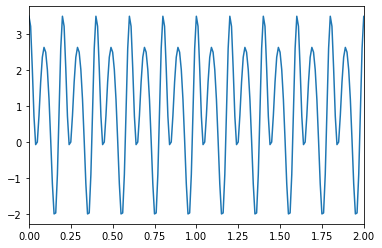

In [ ]:
plt.plot(t, u)
plt.axis(xmin=0, xmax=2)
plt.show()

<h3>Рассчитаем среднее значение методами</h3>

In [ ]:
for i in range(n):
    u[i] = signal(f, t[i])**2
R = 100
print('Среднее значение мощности сигнала методом прямоугольников: {0: f}'.format(rect_integral(t, u)/T/R))
print('Среднее значение мощности сигнала методом трапеций: {0: f}'.format(trap_integral(t, u)/T/R))
print('Среднее значение мощности сигнала по формуле Симпсона: {0: f}'.format(simp_integral(t, u)/T/R))

Среднее значение мощности сигнала методом прямоугольников:  0.036250
Среднее значение мощности сигнала методом трапеций:  0.036250
Среднее значение мощности сигнала по формуле Симпсона:  0.036250


<h3>Построим график средней мощности</h3>

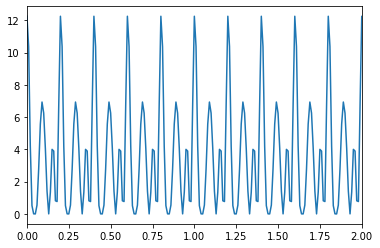

In [ ]:
plt.plot(t, u)
plt.axis(xmin=0, xmax=2)
plt.show()